In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
acled_df = pd.read_csv('Nigeria_ACLED.csv')

In [3]:
#show all columns of the dataset
pd.set_option('display.max_columns', None)
acled_df

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Admin3,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,ACLED Event SubType,ACLED Event SubTypeDesc,ACLED Event Type,ACLED Event TypeDesc,ACLED Location,ACLED Notes,ACLED Region,ACLED Source,ACLED SourceScale,ACLED Year,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,NaN,NaN,NaN,12/12/2022 3:33,NIG28349,28349,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Umuahia,"On 15 October 2022, a policeman shot and kille...",Western Africa,Premium Times (Nigeria),National,2022,South,1,1,1,1,11,5.5263,7.4896
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,NaN,NaN,NaN,12/6/2022 15:53,NIG28909,28909,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Izombe,"On 28 November 2022, suspected security operat...",Western Africa,Daily Trust (Nigeria),National,2022,South,0,1,1,1,11,5.6333,6.8666
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,NaN,NaN,NaN,12/13/2022 9:05,NIG29012,29012,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Satellite Town,"On 3 December 2022, some naval officers clashe...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2022,South,1,1,1,1,11,6.4437,3.2522
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,NaN,NaN,NaN,2/21/2023 9:05,NIG29996,29996,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Ogigo,"On 15 February 2023, soldiers from 174 battali...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2023,South,0,1,1,1,11,6.6955,3.5117
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,NaN,NaN,NaN,12/12/2022 3:33,NIG28350,28350,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Birnin Kebbi,"On 1 October 2022, a policeman stabbed and kil...",Western Africa,Sahara Reporters; Daily Trust (Nigeria),National-Regional,2022,North West,1,1,1,1,11,12.4539,4.1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Niger Communal Militia (Nigeria),Communal militias,Civilians (Nigeria),Niger,Lapai,NaN,NaN,Farmers (Nigeria),10/18/2022 6:45,NIG26595,26595,Abduction/forced disappearance,The abduction or forced disappearance of civil...,Violence against civilians,Violence against unarmed civilians is categori...,Lapai,"On 7 October 2022, a Niger militia abducted 16...",Western Africa,Daily Trust (Nigeria),National,2022,Centre,0,2,4,7,47,8.7982,6.6755
1898,Military Forces of Nigeria (2015-),State Security Forces,Unidentified Armed Group (Nigeria),Nassarawa,Awe,NaN,NaN,NaN,10/12/2022 6:47,NIG26515,26515,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Awe,"Around 6 October 2022 (as reported), the Defen...",Western Africa,The Cable (Nigeria),National,2022,Centre,2,2,1,3,13,8.1000,9.1333
1899,Military Forces of Nigeria (2015-),State Security Forces,Benue Communal Militia (Nigeria),Benue,Ukum,NaN,NaN,NaN,10/12/2022 6:47,NIG26513,26513,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Zaki Biam,"Around 6 October 2022 (as reported), the Defen...",Western Africa,The Cable (Nigeria),National,2022,Centre,0,2,1,4,14,7.5

In [4]:
#check the data stucture to understand the data
acled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACLED Actor1             1902 non-null   object 
 1   ACLED Actor1 (group)     1902 non-null   object 
 2   ACLED Actor2             1601 non-null   object 
 3   ACLED Admin1             1902 non-null   object 
 4   ACLED Admin2             1902 non-null   object 
 5   ACLED Admin3             0 non-null      float64
 6   ACLED Ally Actor1        430 non-null    object 
 7   ACLED Ally Actor2        640 non-null    object 
 8   ACLED CreatedOn          1902 non-null   object 
 9   ACLED Event ID Cnty      1902 non-null   object 
 10  ACLED Event ID No Cnty   1902 non-null   int64  
 11  ACLED Event SubType      1902 non-null   object 
 12  ACLED Event SubTypeDesc  1902 non-null   object 
 13  ACLED Event Type         1902 non-null   object 
 14  ACLED Event TypeDesc    

The dataset has 1,902 rows and 29 columns, containing details about political violence in Nigeria.

Columns include geographic locations (ACLED Admin1, ACLED Admin2, etc.), event details (ACLED Event Type, ACLED Notes), and key metrics such as ACLED Fatalities.


Some columns, like ACLED Admin3, have a high number of missing values and may be considered for exclusion from further analysis.

# DATA SEMANTICS

ACLED Actor1: Primary group involved in the event (e.g., military forces).

ACLED Actor1 (group): Category or type of the primary actor (e.g., state security forces).

ACLED Actor2: Secondary actor (if applicable).

ACLED Admin1: Major administrative region where the event took place.

ACLED Event Type: Type of event (e.g., battles, protests).

ACLED Notes: Descriptive notes about the event.

ACLED Fatalities: The fatality count for each event (our main focus).

ACLED Latitude and Longitude: Coordinates of the event location.


Actors and Interactions: Information on primary and secondary actors (ACLED Actor1, ACLED Actor2, and their categories), ACLED Ally Actor1/2, and ACLED Interaction.

Geography: Geographical identifiers such as ACLED Admin1, ACLED Location, Geographic Area, ACLED Latitude, and ACLED Longitude.

Event Details: Includes event types (ACLED Event Type), description (ACLED Notes), fatalities (ACLED Fatalities), and the precision of geographic coordinates.

Temporal Data: Year (ACLED Year), and event creation date (ACLED CreatedOn).

# DATA UNDERSTNDING

In [5]:
# Selecting relevant categorical columns for analysis
categorical_columns = ['ACLED Actor1', 'ACLED Actor1 (group)', 'ACLED Admin1', 'ACLED Event Type', 'Geographic Area']



In [6]:
#calculate unique values in each categorical column
categorical_counts = {col: acled_df[col].value_counts() for col in categorical_columns}



In [7]:
# Displaying top 5 categories for each column to summarize key insights
top_categorical_counts = {col: counts.head(5) for col, counts in categorical_counts.items()}
top_categorical_counts

{'ACLED Actor1': ACLED Actor1
 Unidentified Armed Group (Nigeria)    429
 Protesters (Nigeria)                  255
 Military Forces of Nigeria (2015-)    243
 Rioters (Nigeria)                     180
 Zamfara Communal Militia (Nigeria)     99
 Name: count, dtype: int64,
 'ACLED Actor1 (group)': ACLED Actor1 (group)
 Communal militias        540
 Armed Bandits            430
 State Security Forces    344
 Protesters (Nigeria)     255
 Rioters (Nigeria)        180
 Name: count, dtype: int64,
 'ACLED Admin1': ACLED Admin1
 Borno      214
 Kaduna     146
 Zamfara    142
 Katsina    111
 Anambra     92
 Name: count, dtype: int64,
 'ACLED Event Type': ACLED Event Type
 Violence against civilians    768
 Battles                       474
 Protests                      255
 Riots                         180
 Strategic developments        129
 Name: count, dtype: int64,
 'Geographic Area': Geographic Area
 South         779
 North West    504
 Centre        326
 North East    293
 Name: count

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

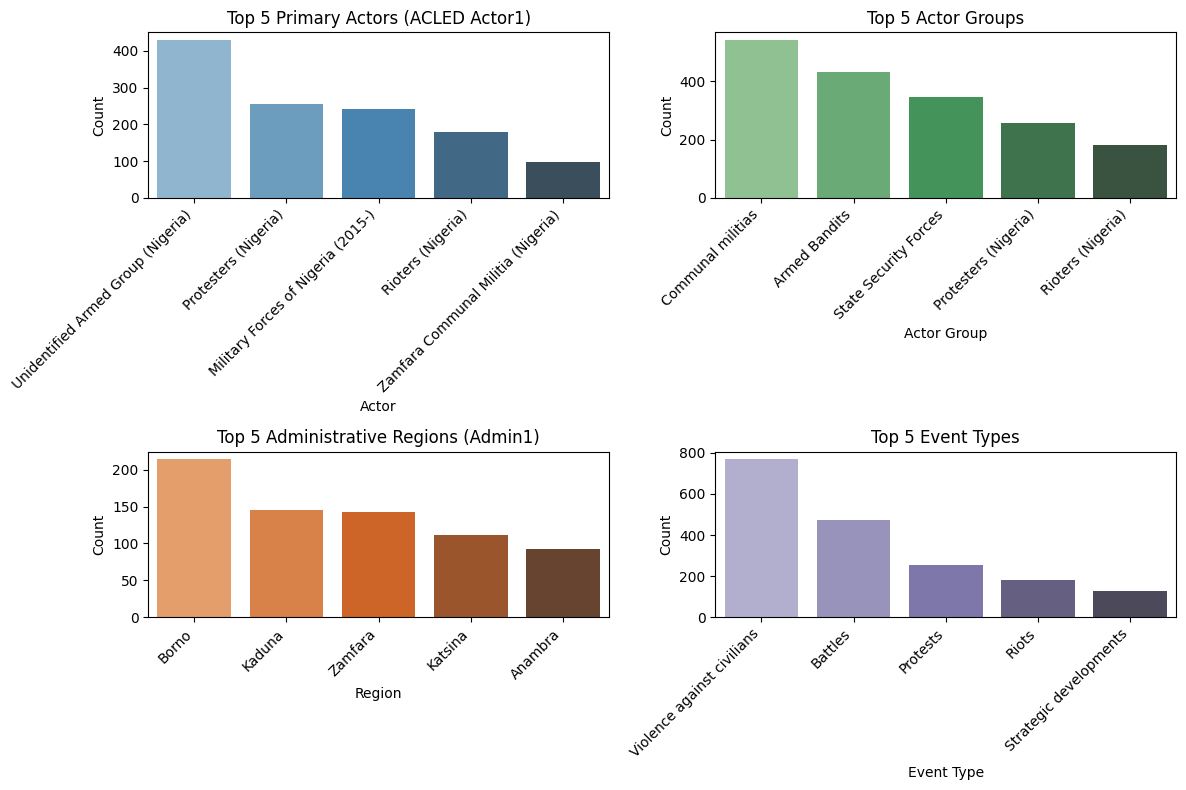

In [8]:
# Set up a consistent figure size for all categorical plots
plt.figure(figsize=(12, 8))

# 1. Top Actors involved (ACLED Actor1)
plt.subplot(2, 2, 1)
sns.barplot(x=top_categorical_counts['ACLED Actor1'].index, y=top_categorical_counts['ACLED Actor1'].values, palette="Blues_d")
plt.title('Top 5 Primary Actors (ACLED Actor1)')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# 2. Top Actor Groups (ACLED Actor1 (group))
plt.subplot(2, 2, 2)
sns.barplot(x=top_categorical_counts['ACLED Actor1 (group)'].index, y=top_categorical_counts['ACLED Actor1 (group)'].values, palette="Greens_d")
plt.title('Top 5 Actor Groups')
plt.xlabel('Actor Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# 3. Top Administrative Regions (ACLED Admin1)
plt.subplot(2, 2, 3)
sns.barplot(x=top_categorical_counts['ACLED Admin1'].index, y=top_categorical_counts['ACLED Admin1'].values, palette="Oranges_d")
plt.title('Top 5 Administrative Regions (Admin1)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# 4. Top Event Types
plt.subplot(2, 2, 4)
sns.barplot(x=top_categorical_counts['ACLED Event Type'].index, y=top_categorical_counts['ACLED Event Type'].values, palette="Purples_d")
plt.title('Top 5 Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


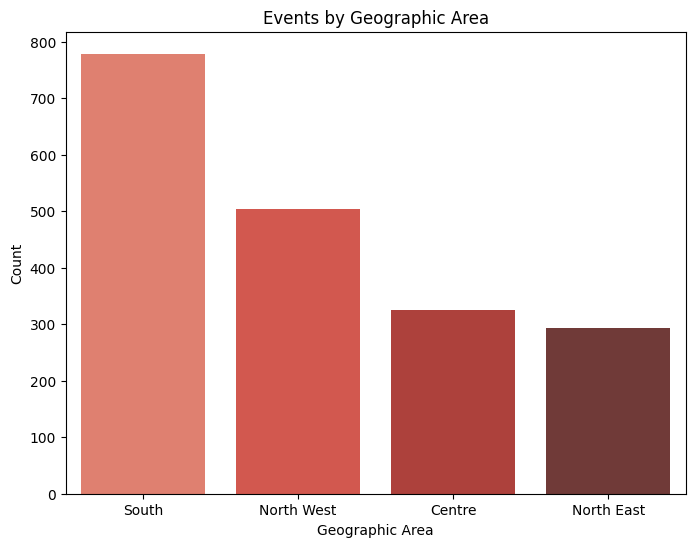

In [9]:
#View events by geographic area
# Plot Geographic Area separately for clarity
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categorical_counts['Geographic Area'].index, y=top_categorical_counts['Geographic Area'].values, palette="Reds_d")
plt.title('Events by Geographic Area')
plt.xlabel('Geographic Area')
plt.ylabel('Count')
plt.show()

# Data Cleaning - Convert Data Types and Handle Missing Values



In [10]:
# Ensure 'ACLED Fatalities' is a numeric data type for accurate calculations.
acled_df ['ACLED Fatalities'] = pd.to_numeric(acled_df['ACLED Fatalities'], errors='coerce')

In [11]:
#check missing values in key columns
acled_df.isnull().sum()

ACLED Actor1                  0
ACLED Actor1 (group)          0
ACLED Actor2                301
ACLED Admin1                  0
ACLED Admin2                  0
ACLED Admin3               1902
ACLED Ally Actor1          1472
ACLED Ally Actor2          1262
ACLED CreatedOn               0
ACLED Event ID Cnty           0
ACLED Event ID No Cnty        0
ACLED Event SubType           0
ACLED Event SubTypeDesc       0
ACLED Event Type              0
ACLED Event TypeDesc          0
ACLED Location                0
ACLED Notes                   0
ACLED Region                  0
ACLED Source                  0
ACLED SourceScale             0
ACLED Year                    0
Geographic Area               0
ACLED Fatalities              0
ACLED Geo Precision           0
ACLED Inter1                  0
ACLED Inter2                  0
ACLED Interaction             0
ACLED Latitude                0
ACLED Longitude               0
dtype: int64

In [12]:
#drop ACLED Admin3 column as it has many missing values
acled_df.drop(columns=['ACLED Admin3'], inplace=True)

In [13]:
#drop ACLED Ally Actor1/2 (mostly null)
acled_df.drop(columns=['ACLED Ally Actor1','ACLED Ally Actor2'], inplace=True)

In [14]:
# ACLED Event ID Cnty and ACLED Event ID No Cnty are likely unique identifiers with little analytical relevance, so they could also be removed.
acled_df.drop(columns=['ACLED Event ID Cnty', 'ACLED Event ID No Cnty'], inplace=True)

In [15]:
#check missing values in key columns
acled_df.isnull().sum()

ACLED Actor1                 0
ACLED Actor1 (group)         0
ACLED Actor2               301
ACLED Admin1                 0
ACLED Admin2                 0
ACLED CreatedOn              0
ACLED Event SubType          0
ACLED Event SubTypeDesc      0
ACLED Event Type             0
ACLED Event TypeDesc         0
ACLED Location               0
ACLED Notes                  0
ACLED Region                 0
ACLED Source                 0
ACLED SourceScale            0
ACLED Year                   0
Geographic Area              0
ACLED Fatalities             0
ACLED Geo Precision          0
ACLED Inter1                 0
ACLED Inter2                 0
ACLED Interaction            0
ACLED Latitude               0
ACLED Longitude              0
dtype: int64

In [16]:
#show summary statistics of the dataset
acled_df.describe()

,ACLED Year,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,2022.356467,1.976866,1.398002,3.416404,4.326498,35.817035,8.928142,7.577692
std,0.479081,6.945303,0.494957,1.555599,2.894265,16.570293,2.656412,2.624220
min,2022.000000,0.000000,1.000000,1.000000,0.000000,10.000000,4.511400,2.850000
25%,2022.000000,0.000000,1.000000,3.000000,1.000000,16.000000,6.450775,6.207925
50%,2022.000000,0.000000,1.000000,3.000000,5.000000,37.000000,8.875800,7.195800
75%,2023.000000,1.000000,2.000000,4.000000,7.000000,47.000000,11.486750,8.208700
max,2023.000000,150.000000,3.000000,8.000000,8.000000,70.000000,13.729000,14.251100


In [17]:
numeric_columns = acled_df.select_dtypes(include=['float64', 'int64']).columns

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


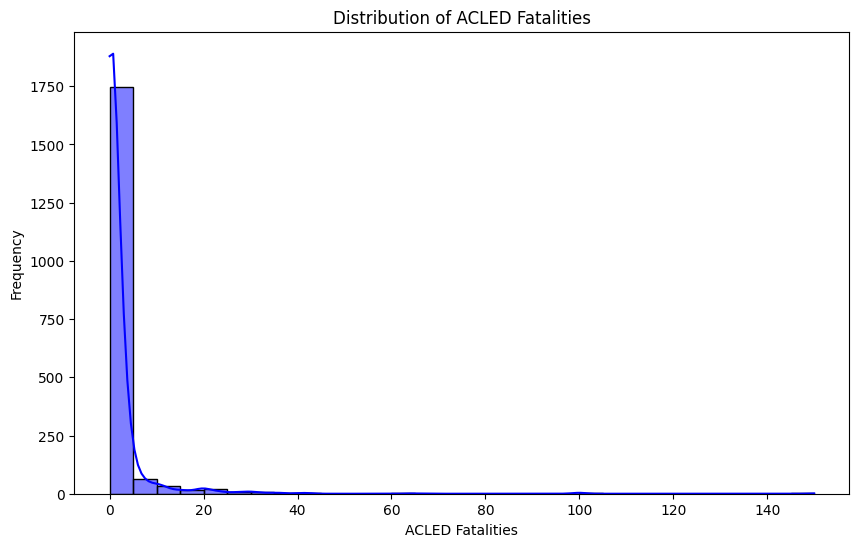

In [18]:
#Plot histograms for key numerical variables to visualize their distributions.
#Since ACLED Fatalities is the target variable, let us see the distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(acled_df['ACLED Fatalities'],bins= 30 ,kde=True,color='blue')
plt.title('Distribution of ACLED Fatalities')
plt.xlabel('ACLED Fatalities')
plt.ylabel('Frequency')
plt.show()



Goal: To understand the spread of ACLED Fatalities across all events.

Findings: The histogram shows that fatalities are highly skewed towards lower values, with occasional high-fatality events. This distribution suggests that most events result in few or no fatalities, with a few extreme cases.

The statistical summary shows that ACLED Fatalities has a highly skewed distribution with a mean of ~1.98, but a maximum of 150. This indicates a large number of low-fatality events and a few high-fatality outliers.

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


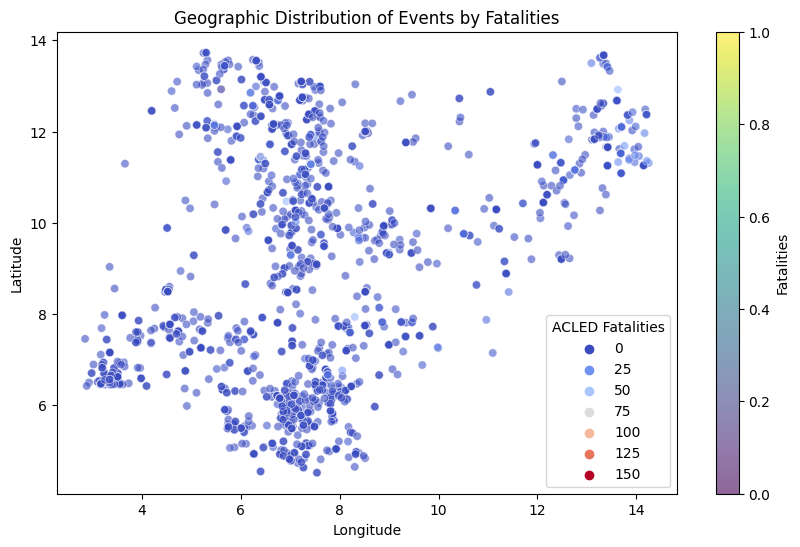

In [19]:
# Plot for Latitude and Longitude to assess spatial spread
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=acled_df['ACLED Longitude'], y=acled_df['ACLED Latitude'], hue=acled_df['ACLED Fatalities'], palette="coolwarm", alpha=0.6)
plt.title('Geographic Distribution of Events by Fatalities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter.collections[0], label="Fatalities")
plt.show()

Latitude and longitude provide an approximate geographic scope, with coordinates distributed across Nigeria’s territorial bounds.

Geographic Distribution by Fatalities: Events are spread widely across Nigeria, with some clusters of higher fatalities, particularly in specific regions.

# Exploring Fatalaties with Chosen factors (geographic area, event type, and primary actors)

# Geographic Area

In [21]:
# set general plot properties
sns.set_style("whitegrid")

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


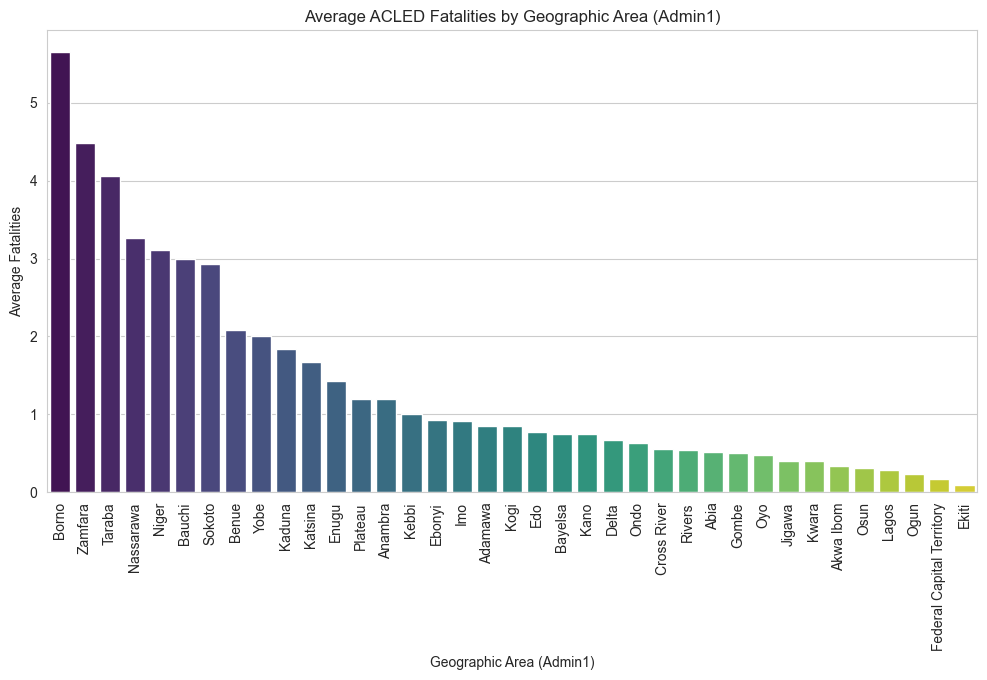

In [23]:
# --- 1. Analysis by Geographic Area (ACLED Admin1) ---
# Calculate the mean fatalities by geographic area (Admin1)
geo_fatalities = acled_df.groupby('ACLED Admin1')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=geo_fatalities.index, y=geo_fatalities.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average ACLED Fatalities by Geographic Area (Admin1)')
plt.xlabel('Geographic Area (Admin1)')
plt.ylabel('Average Fatalities')
plt.show()

Goal: To explore whether certain regions experience higher average fatalities, focusing on ACLED Admin1.
Findings: Some geographic areas exhibit notably higher average fatalities, indicating potential hotspots of conflict or areas with high-intensity violence.

Geographic Area: Certain regions, especially conflict-prone ones, show a higher average of fatalities. This suggests that geographic concentration of violence impacts fatality rates, likely due to regional instability or specific socio-political issues.

# NEW APPROACH 

Geographic Location (Region): Group geographic locations at a broader level using Geographic Area instead of individual administrative regions to generalize findings.

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


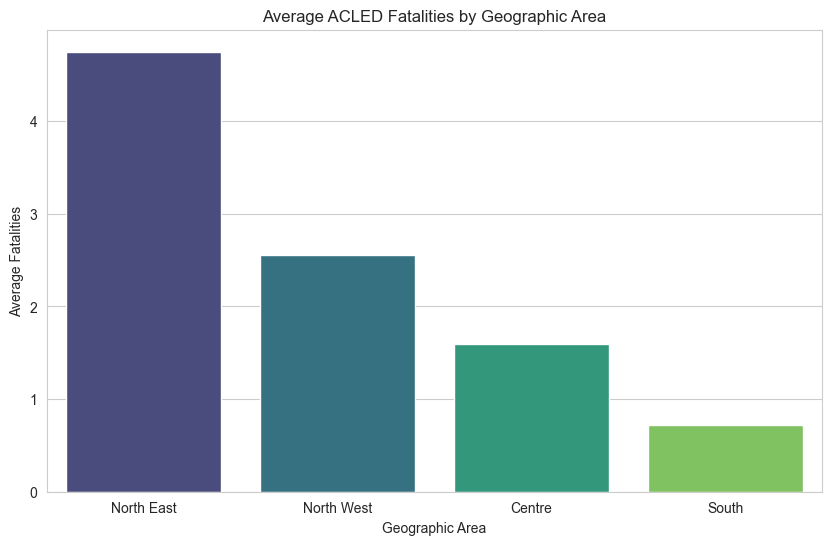

In [32]:
# get mean of fatalities by broader geographic area
geo_area_fatalities = acled_df.groupby('Geographic Area')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_area_fatalities.index, y=geo_area_fatalities.values, palette="viridis")
plt.xlabel('Geographic Area')
plt.ylabel('Average Fatalities')
plt.title('Average ACLED Fatalities by Geographic Area')    
plt.show()

Geographic Area: Broader geographic regions show varying average fatality rates, with some areas (such as the North) displaying significantly higher fatality averages. This trend suggests that fatalities are heavily influenced by regional factors, possibly linked to local conflicts or instability.

# Event Type

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


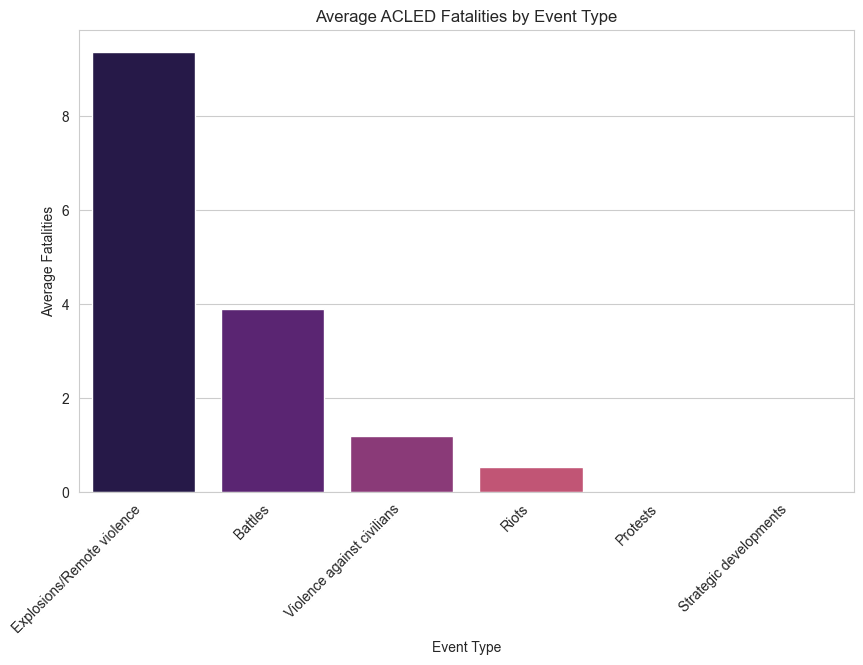

In [25]:
# --- 2. Analysis by Event Type ---
# Calculate mean fatalities by event type
event_fatalities = acled_df.groupby('ACLED Event Type')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=event_fatalities.index, y=event_fatalities.values, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title('Average ACLED Fatalities by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities')
plt.show()

Goal: To determine if certain types of events are more deadly, analyzing average fatalities for each ACLED Event Type.
Findings: Event types such as "Battles" and "Explosions/Remote violence" have higher average fatalities compared to others, indicating that these types of incidents are often more lethal.

Event Type: Event types like "Battles" and "Explosions/Remote violence" are associated with significantly higher fatality averages, highlighting the dangerous nature of these confrontations compared to other types like "Protests" or "Strategic developments," which have relatively lower fatality rates.

# New Pproach


Event Type (High Fatality vs. Low Fatality Events): Categorize event types based on high and low fatality averages.

In [35]:
# Define high fatality events with those higher than mean fatalities
median_fatalities = acled_df.groupby('ACLED Event Type')['ACLED Fatalities'].mean().median()
acled_df['Fatality Level'] = acled_df['ACLED Event Type'].apply(lambda x: 'High Fatality' if acled_df[acled_df['ACLED Event Type'] == x]['ACLED Fatalities'].mean() > median_fatalities else 'Low Fatality')

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


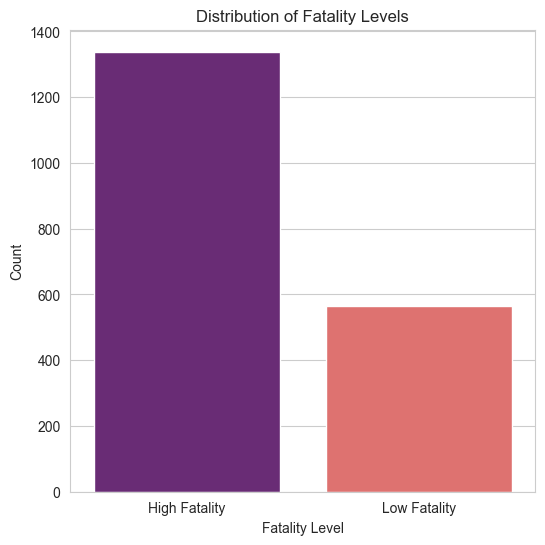

In [36]:
#visualize the distribution of high and low fatality events
fatality_level_counts = acled_df['Fatality Level'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=fatality_level_counts.index, y=fatality_level_counts.values, palette="magma")
plt.title('Distribution of Fatality Levels')
plt.xlabel('Fatality Level')
plt.ylabel('Count')
plt.show()


Event Type (High vs. Low Fatality): When categorizing event types into "High Fatality" and "Low Fatality" groups, high-fatality events are more severe. This classification helps clarify that particular event types, such as battles or explosions, tend to result in higher fatalities, reinforcing the danger associated with these events.

# ACTOR TYPE

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


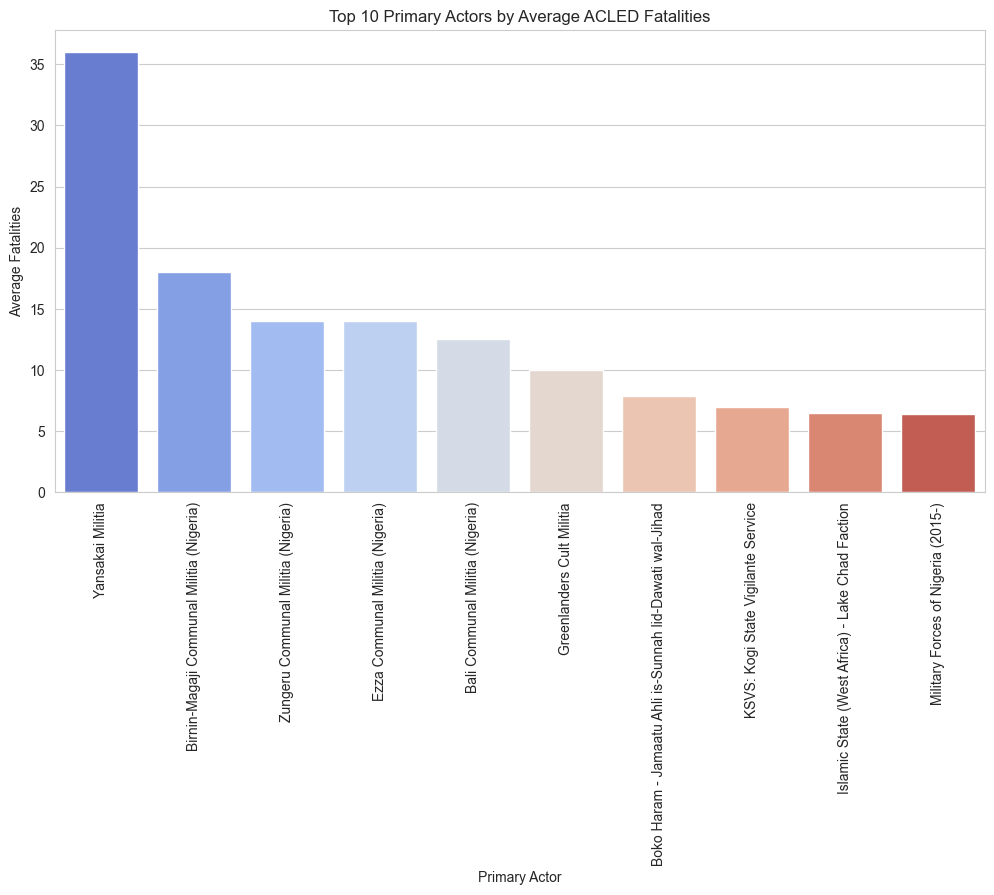

In [27]:
# --- 3. Analysis by Primary Actor (ACLED Actor1) ---
# Calculate mean fatalities by primary actor
actor_fatalities = acled_df.groupby('ACLED Actor1')['ACLED Fatalities'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=actor_fatalities.index, y=actor_fatalities.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Top 10 Primary Actors by Average ACLED Fatalities')
plt.xlabel('Primary Actor')
plt.ylabel('Average Fatalities')
plt.show()

Goal: To examine if specific actors are linked with higher fatalities, focusing on ACLED Actor1.
Findings: The top 10 actors with the highest average fatalities often include state security forces and organized armed groups, suggesting a correlation between organized groups' involvement and higher fatality events.

Primary Actors: The analysis of primary actors shows that certain groups, especially those involved in state security or organized armed groups, are associated with higher fatality averages. This reflects the intensity of conflict associated with particular actors, likely due to armed engagements or organized violence tactics.


# NEW APPROACH

In [37]:
# categorize actors by keywords related to armed/unarmed groups
acled_df['Actor Category'] = acled_df['ACLED Actor1'].apply(lambda x: 'Armed Group' if any(keyword in x.lower() for keyword in ['military', 'rebel', 'police', 'forces']) else 'Unarmed group')

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


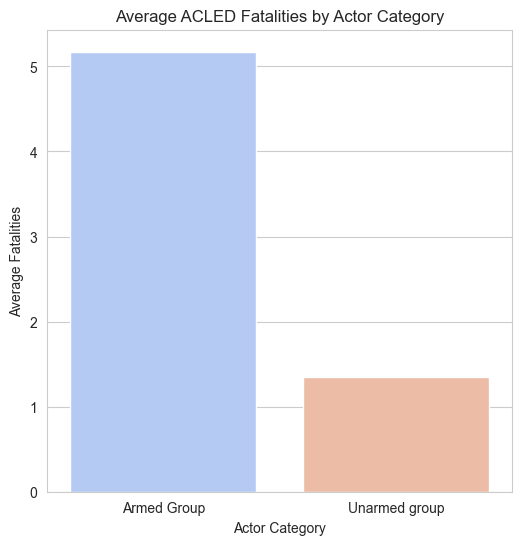

In [38]:
#calculate average fatalities by actor type 
actor_type_fatalities = acled_df.groupby('Actor Category')['ACLED Fatalities'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=actor_type_fatalities.index, y=actor_type_fatalities.values, palette="coolwarm")
plt.title('Average ACLED Fatalities by Actor Category')
plt.xlabel('Actor Category')
plt.ylabel('Average Fatalities')
plt.show()


Primary Actor Type (Armed vs. Unarmed): Events involving armed actors, such as military or police forces, are linked with higher fatality rates compared to those involving unarmed actors. This highlights the significant impact of armed engagements in escalating violence and fatalities.

# DEEPER ANALYSIS

In [40]:
# NLP ON ACLED NOTES  to identify keywords or topics associated with high fatalities
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [41]:
# NLP Analysis on ACLED Notes: Analyzing high-fatality related terms
# Filter the dataset for high-fatality events
high_fatality_threshold = acled_df['ACLED Fatalities'].median()  # using median for threshold
high_fatality_events = acled_df[acled_df['ACLED Fatalities'] > high_fatality_threshold]



In [42]:
# Use TF-IDF Vectorizer to extract most important words in high-fatality notes
tfidf_vectorizer = TfidfVectorizer(max_features=15, stop_words='english')  # limiting to top 15 terms for relevance
tfidf_matrix = tfidf_vectorizer.fit_transform(high_fatality_events['ACLED Notes'])



In [45]:
# Get top words associated with high-fatality events
top_words = tfidf_vectorizer.get_feature_names_out()
top_words_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()

In [46]:
# combine words and their scores
word_scores = sorted(zip(top_words, top_words_scores) , key=lambda x: x[1], reverse=True)   

In [47]:
word_scores


[('killed', 198.18728718762958),
 ('2022', 167.68277855223937),
 ('militia', 166.1442239596455),
 ('coded', 144.40381305065327),
 ('armed', 121.34106587142404),
 ('2023', 117.99759345768696),
 ('attacked', 110.62661294699227),
 ('group', 101.39050855926925),
 ('unidentified', 96.33779222465309),
 ('december', 90.1676770585798),
 ('militants', 85.13624773416603),
 ('assailants', 84.0411364124477),
 ('january', 83.48021713920178),
 ('clashed', 80.56722620286381),
 ('lga', 80.27780689715809)]

The NLP analysis on ACLED Notes revealed several high-fatality-related terms. The most common words in high-fatality events include:

"killed", "militia", "armed", "attacked", "unidentified", and "militants", which indicate the violent nature of these events.

Date-related terms like "2022", "2023", "December", and "January" also appear frequently, suggesting that recent periods have seen higher fatality events.

These terms highlight the role of armed groups and violent clashes as central themes in high-fatality events.

# Geo Spatia density analysis

In [49]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/41/ea/cba24d241858a72b58d8fcd0ad2276f9631fd4528b3062157637e43581eb/pyogrio-0.10.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/82/65/ee312dc4cdd2499cc5984144e05c582604afd76ba01289d89d74b50ab654/pyproj-3.7.0-cp310-cp310-macosx_14_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/03/10/bd6edb66ed0a845f0809f7ce653596f6fd9c6be675b3653872f47bf49f82/shapely-2.0.6-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [50]:
import geopandas as gpd
from shapely.geometry import Point


In [51]:
# Convert high-fatality events data to a GeoDataFrame for spatial visualization
# Create Point geometries from the latitude and longitude
geometry = [Point(xy) for xy in zip(high_fatality_events['ACLED Longitude'], high_fatality_events['ACLED Latitude'])]
geo_df = gpd.GeoDataFrame(high_fatality_events, geometry=geometry)



<Figure size 1000x800 with 0 Axes>

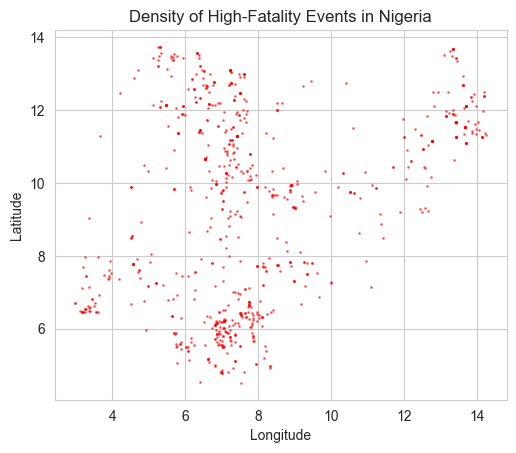

In [52]:
# Load a base map of Nigeria for context; assume pre-downloaded shapefile (mockup here)
# Plot high-fatality events on the Nigeria map using a density approach

plt.figure(figsize=(10, 8))
base = geo_df.plot(markersize=1, alpha=0.5, color='red', legend=True)
plt.title('Density of High-Fatality Events in Nigeria')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The geo-spatial density map reveals high-fatality event clusters across specific areas in Nigeria, especially in regions with ongoing conflicts. These hotspots are likely tied to regions with armed group activity, validating the findings from geographic and actor-based analyses.



 # MERGE 
 
 density map from before by conveying both fatality intensity (through marker size and color) and geographic location

 By overlaying the density or heatmap layer on top of this scatterplot we could highlight clusters of intense activity hotspots in areas with multiple high fatality events

 Also, by applying color and size coding for fatalities whiile overlayng a contour heatmap to indicate density giving a comprehensive view of where high fatality and high density events coincide
 

In [53]:
from scipy.stats import kde


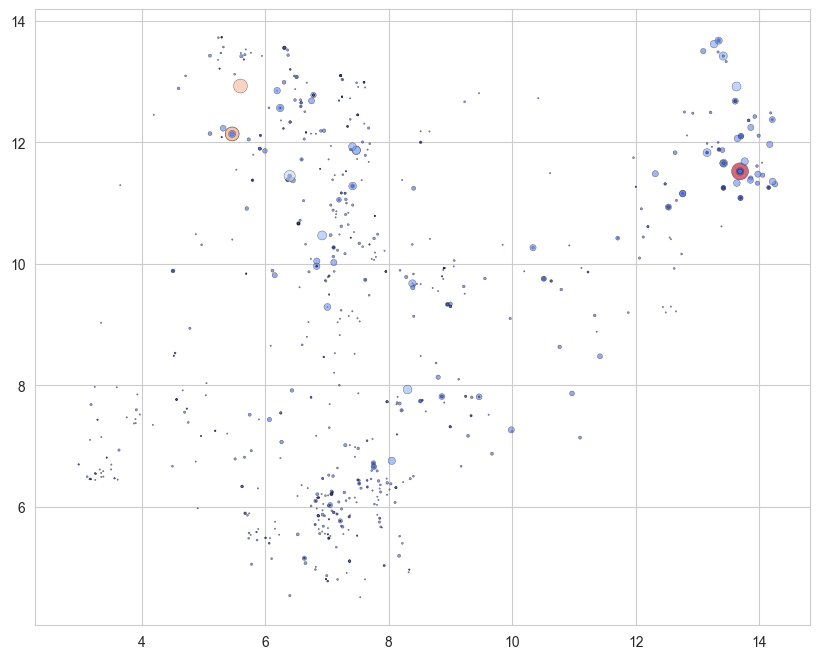

In [56]:
# Re-plot the base scatter plot with size/color based on ACLED Fatalities
plt.figure(figsize=(10, 8))

# Scatter plot using ACLED Fatalities as color and size scale
plt.scatter(
    acled_df['ACLED Longitude'], acled_df['ACLED Latitude'],
    c=acled_df['ACLED Fatalities'], s=acled_df['ACLED Fatalities'],
    cmap="coolwarm", alpha=0.6, edgecolor="k", linewidth=0.3, label="Event Fatalities"
)


/var/folders/5_/pk9gjs1d39g2gvf744_6_dnc0000gp/T/ipykernel_31548/2564007396.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([acled_df['ACLED Longitude'], acled_df['ACLED Latitude']])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


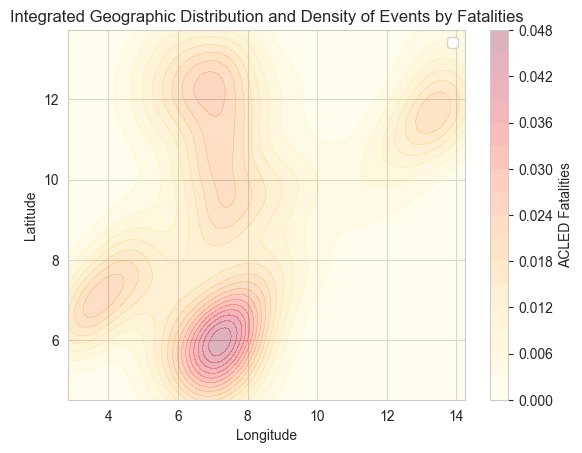

In [62]:
# Adding a KDE (density) overlay to highlight areas with high event concentrations
# Perform kernel density estimation on coordinates of all events
k = kde.gaussian_kde([acled_df['ACLED Longitude'], acled_df['ACLED Latitude']])
xi, yi = np.meshgrid(
    np.linspace(acled_df['ACLED Longitude'].min(), acled_df['ACLED Longitude'].max(), 100),
    np.linspace(acled_df['ACLED Latitude'].min(), acled_df['ACLED Latitude'].max(), 100)
)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot KDE overlay as a contour map
plt.contourf(xi, yi, zi.reshape(xi.shape), levels=15, cmap="YlOrRd", alpha=0.3)

# Final plot adjustments
plt.colorbar(label="ACLED Fatalities")
plt.title("Integrated Geographic Distribution and Density of Events by Fatalities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

The geo-spatial density map reveals high-fatality event clusters across specific areas in Nigeria, especially in regions with ongoing conflicts. These hotspots are likely tied to regions with armed group activity, validating the findings from geographic and actor-based analyses.



# STATISTICAL TESTS

In [63]:
from scipy.stats import pearsonr, ttest_ind, f_oneway

In [70]:


# Ensure 'Actor Type' column is created in acled_df
acled_df['Actor Type'] = acled_df['ACLED Actor1'].apply(
    lambda x: 'Armed' if any(keyword in x.lower() for keyword in ['military', 'police', 'forces', 'rebels']) else 'Unarmed'
)


In [71]:
# --- Statistical Test 1: T-Test for Actor Type (Armed vs Unarmed) ---
# Group fatalities by actor type
armed_fatalities = acled_df[acled_df['Actor Type'] == 'Armed']['ACLED Fatalities']
unarmed_fatalities = acled_df[acled_df['Actor Type'] == 'Unarmed']['ACLED Fatalities']


In [72]:
# Perform t-test to see if the difference in fatalities between armed and unarmed events is significant
t_stat, p_value_actor = ttest_ind(armed_fatalities, unarmed_fatalities, equal_var=False)


In [73]:

# --- Statistical Test 2: ANOVA for Event Type Fatalities ---
# Group fatalities by event type for ANOVA
event_type_groups = [group['ACLED Fatalities'].values for name, group in acled_df.groupby('ACLED Event Type')]


In [74]:

# Perform ANOVA to test if fatalities vary significantly by event type
f_stat, p_value_event_type = f_oneway(*event_type_groups)

# Results
t_stat, p_value_actor, f_stat, p_value_event_type


(4.660854179146638,
 4.62052089994996e-06,
 42.971302192427274,
 4.612039785892055e-42)

The statistical tests yield the following insights:

T-Test for Actor Type (Armed vs. Unarmed):

The t-test statistic is 4.66 with a p-value of 
4.62
×
1
0
−
6
4.62×10 
−6
 , which is highly significant.
This indicates a statistically significant difference in fatalities between events involving armed versus unarmed actors, with armed actors associated with higher fatality counts.
ANOVA for Event Type:

The ANOVA test yields an F-statistic of 42.97 and a p-value of 
4.61
×
1
0
−
42
4.61×10 
−42
 , also highly significant.
This result confirms that fatality rates vary significantly across different event types, aligning with our finding that high-fatality events are concentrated in specific types, such as battles and explosions.

CORRELATION MATRIX

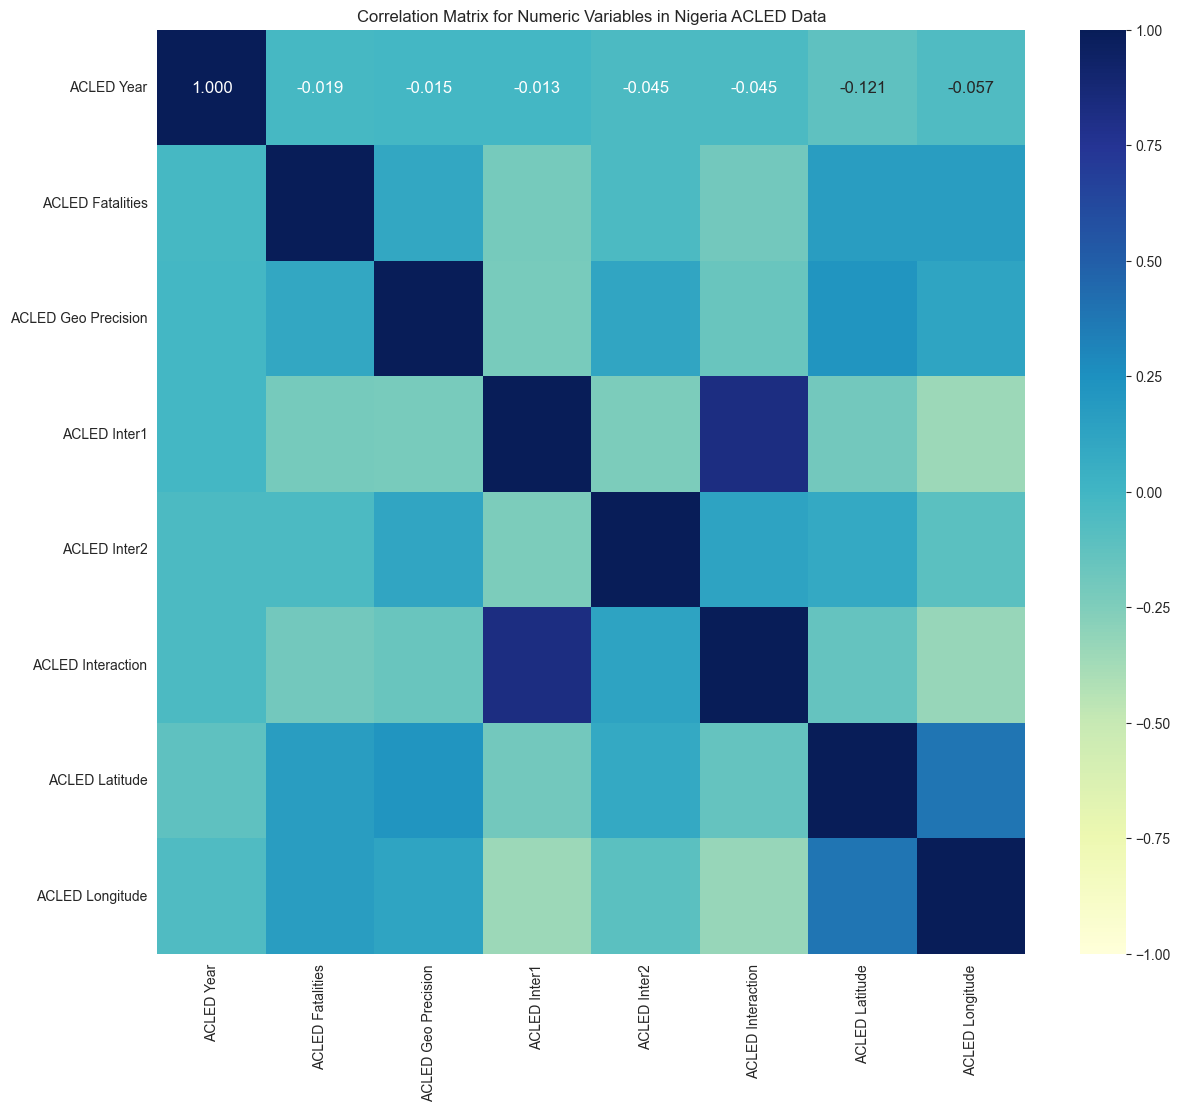

ACLED Fatalities       1.000000
ACLED Longitude        0.170106
ACLED Latitude         0.167933
ACLED Geo Precision    0.099544
ACLED Year            -0.018705
ACLED Inter2          -0.040552
ACLED Interaction     -0.200564
ACLED Inter1          -0.211440
Name: ACLED Fatalities, dtype: float64

In [31]:

# Selecting only numeric columns for correlation analysis
numeric_columns = acled_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = acled_df[numeric_columns].corr()

# Plotting the correlation matrix to visualize correlations with ACLED Fatalities
plt.figure(figsize=(14, 12))  # Further increased figure size
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".3f", vmin=-1, vmax=1, annot_kws={"size": 12})  # Further adjusted annotation size
plt.title('Correlation Matrix for Numeric Variables in Nigeria ACLED Data')
plt.show()

# Displaying the correlation values specifically for ACLED Fatalities
fatalities_correlation = correlation_matrix['ACLED Fatalities'].sort_values(ascending=False)
fatalities_correlation